# Name: Saurabh Raj
# SRN: PES1P22CA182
# SEC: C

In [1]:
import pandas as pd
import numpy as np
import seaborn as scs
from sklearn.model_selection import GridSearchCV

In [2]:
train_data = pd.read_csv("train.csv")

In [3]:
train_data.head()

,top_left_square,top_middle_square,top_right_square,middle_left_square,middle_middle_square,middle_right_square,bottom_left_square,bottom_middle_square,bottom_right_square,class,Id
0,x,x,x,x,o,o,x,o,o,0,0
1,x,x,x,x,o,o,o,x,o,0,1
2,x,x,x,x,o,o,o,b,b,0,3
3,x,x,x,x,o,b,o,b,o,0,7
4,x,x,x,x,o,b,b,o,o,0,8


In [4]:
df = pd.read_csv("tic_tac_toe_dataset.csv")
df.head()

,top_left_square,top_middle_square,top_right_square,middle_left_square,middle_middle_square,middle_right_square,bottom_left_square,bottom_middle_square,bottom_right_square,class
0,x,x,x,x,o,o,x,o,o,0
1,x,x,x,x,o,o,o,x,o,0
2,x,x,x,x,o,o,o,o,x,0
3,x,x,x,x,o,o,o,b,b,0
4,x,x,x,x,o,o,b,o,b,0


### Fixing Id as Index

In [5]:
train_data.set_index(train_data.Id, inplace=True)
del train_data['Id']
train_data.head()

,top_left_square,top_middle_square,top_right_square,middle_left_square,middle_middle_square,middle_right_square,bottom_left_square,bottom_middle_square,bottom_right_square,class
Id,,,,,,,,,,
0,x,x,x,x,o,o,x,o,o,0
1,x,x,x,x,o,o,o,x,o,0
3,x,x,x,x,o,o,o,b,b,0
7,x,x,x,x,o,b,o,b,o,0
8,x,x,x,x,o,b,b,o,o,0


### Treating data for better results

In [6]:
train_data.replace('x', 1, inplace=True)
train_data.replace('o', 0, inplace=True)
train_data.replace('b', 2, inplace=True)

In [7]:
train_data.head()

,top_left_square,top_middle_square,top_right_square,middle_left_square,middle_middle_square,middle_right_square,bottom_left_square,bottom_middle_square,bottom_right_square,class
Id,,,,,,,,,,
0,1,1,1,1,0,0,1,0,0,0
1,1,1,1,1,0,0,0,1,0,0
3,1,1,1,1,0,0,0,2,2,0
7,1,1,1,1,0,2,0,2,0,0
8,1,1,1,1,0,2,2,0,0,0


### Splitting into test and train

In [8]:
x = train_data.iloc[:,:9]
y = train_data.iloc[:,9:10]

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.25, random_state=1, shuffle=True)

In [10]:
ytrain = np.ravel(ytrain)

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain, np.ravel(ytrain))

LogisticRegression()

In [12]:
from sklearn.metrics import accuracy_score
ypred = lr.predict(xtest)
print("Accuracy with Logistic Regression: ",accuracy_score(ytest, ypred) * 100, "%")

Accuracy with Logistic Regression:  72.89156626506023 %


<Axes: >

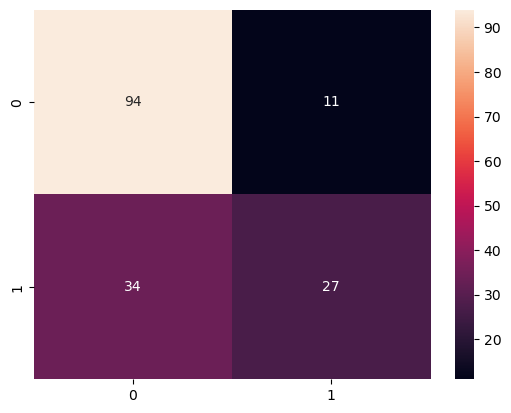

In [13]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)
scs.heatmap(cm, annot=True)

## KNN Classification

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=1)
knn.fit(xtrain, np.ravel(ytrain))
ypred = knn.predict(xtest)
print("Accuracy with KNN: ",accuracy_score(ytest, ypred) * 100, "%")

Accuracy with KNN:  90.96385542168674 %


## Linear SVM

In [15]:
from sklearn.svm import LinearSVC
clf = LinearSVC(C=1)
clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)

In [16]:
print(clf.score(xtrain, ytrain))
print(clf.score(xtest, ytest))

0.717741935483871
0.7349397590361446


## Non-Linear SVM

In [17]:
from sklearn.svm import SVC
clf = SVC()

In [18]:
grid_value = {
    'kernel' : ['linear', 'rbf'],
    'C' : [0.001, 0.01, 1, 10, 100],
    'gamma' : ['auto', 'scale']
}

best_clf = GridSearchCV(clf, param_grid=grid_value, scoring='accuracy', cv=5)
best_clf.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.001, 0.01, 1, 10, 100],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [19]:
best_clf.score(xtrain, ytrain)
best_clf.score(xtest, ytest)

0.9759036144578314

## NaiveBayes

In [20]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB(priors=None)
nb.fit(xtrain, ytrain)
ypred = nb.predict(xtest)
print("Accuracy with NaiveBayes: ",accuracy_score(ytest, ypred) * 100, "%")

Accuracy with NaiveBayes:  73.49397590361446 %


## DecisionTree Classifier with GridSearchCV

In [21]:
from sklearn.tree import DecisionTreeClassifier
DT = GridSearchCV(DecisionTreeClassifier(), 
                     param_grid={'criterion':['entropy', 'gini']},
                     scoring="accuracy",
                     cv=10
                    )

In [22]:
DT.fit(xtrain, ytrain)
ypred = DT.predict(xtest)
print("Training Accuracy: ", DT.score(xtrain, ytrain))
print("Accuracy with DecisionTree: ",DT.score(xtest, ypred) * 100, "%")

Training Accuracy:  1.0
Accuracy with DecisionTree:  100.0 %


## RandomForest

In [23]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=2000)
rfc.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=2000)

In [24]:
ypred = rfc.predict(xtest)

In [25]:
rfc.score(xtrain, ytrain), rfc.score(xtest,ytest)
print("Accuracy with Random Forest: ",rfc.score(xtest, ytest) * 100, "%")

Accuracy with Random Forest:  96.3855421686747 %


# Testing with Kaggle Provided TEST data

In [26]:
test_data = pd.read_csv("test.csv")

In [27]:
test_data.head()

,top_left_square,top_middle_square,top_right_square,middle_left_square,middle_middle_square,middle_right_square,bottom_left_square,bottom_middle_square,bottom_right_square,Id
0,x,x,x,x,o,o,o,o,x,2
1,x,x,x,x,o,o,b,o,b,4
2,x,x,x,x,o,o,b,b,o,5
3,x,x,x,x,o,b,o,o,b,6
4,x,x,x,x,b,o,o,o,b,9


In [28]:
test_data.replace({'x' : 1, 'o' : 0, 'b': 2}, inplace=True)

In [29]:
test_data.head()

,top_left_square,top_middle_square,top_right_square,middle_left_square,middle_middle_square,middle_right_square,bottom_left_square,bottom_middle_square,bottom_right_square,Id
0,1,1,1,1,0,0,0,0,1,2
1,1,1,1,1,0,0,2,0,2,4
2,1,1,1,1,0,0,2,2,0,5
3,1,1,1,1,0,2,0,0,2,6
4,1,1,1,1,2,0,0,0,2,9


In [30]:
xtest = test_data.iloc[:,:9]

### Generating prediction results with Decision Tree, as it has the highest accuracy

In [31]:
pred_res = DT.predict(xtest)
pred_res.shape, test_data.shape

((296,), (296, 10))

In [32]:
pred_res

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0], dtype=int64)

# Prepare data to upload

In [33]:
pred_res = pd.DataFrame({'Id' : test_data.Id, 'class' : pred_res})
pred_res.head()

,Id,class
0,2,0
1,4,0
2,5,0
3,6,0
4,9,0


In [34]:
pred_res.set_index(pred_res['Id'], inplace=True)
del pred_res['Id']

In [35]:
pred_res.head()

,class
Id,
2,0
4,0
5,0
6,0
9,0


In [36]:
op = pred_res.to_csv("PES1PG22CA182.csv")

# Conclusion

#### This is the output of accuracy with different algorithms applied on the Tic_Tac_Toe dataset.


|Algorithms Applied     |  Accuracy(%)    |
|---------------------  | --------------- | 
| LogisticRegression    | 72.89           |       
| Linear SVM            | 73.49           |
| NavieBayes(Gaussia)   | 73.49           |
| KNN                   | 90.36           |
| Random Forest         | 96.38           |
| Non-Linear SVM        | 97.59           |
| Decision Tree         | 100             |